## 표본분포의 이해


In [37]:
import pandas as pd
import numpy as np
import itertools

ex4_9_pop = [6, 2, 4, 8, 10]
ex4_9_n = 2

In [38]:
ex4_9_df = pd.DataFrame(ex4_9_pop, columns=["value"])
print(ex4_9_df)

   value
0      6
1      2
2      4
3      8
4     10


In [39]:
# (1) 모집단의 평균과 분산 구하기
ex4_9_mean = ex4_9_df["value"].mean()
ex4_9_var = ex4_9_df["value"].var(ddof=0)

print(f"=== 1. 모집단 정보 ===")
print(f"모평균(μ): {ex4_9_mean}")
print(f"모분산(σ²): {ex4_9_var}")

=== 1. 모집단 정보 ===
모평균(μ): 6.0
모분산(σ²): 8.0


In [40]:
# (2-1) 모든 가능한 표본 만들기 (복원추출)
ex4_9_all_samples = list(itertools.product(ex4_9_pop, repeat=ex4_9_n))
print(ex4_9_all_samples)
print(f"샘플 수: {len(ex4_9_all_samples)}")

# 데이터프레임으로 변환
ex4_9_df_samples = pd.DataFrame(ex4_9_all_samples, columns=["1번", "2번"])

[(6, 6), (6, 2), (6, 4), (6, 8), (6, 10), (2, 6), (2, 2), (2, 4), (2, 8), (2, 10), (4, 6), (4, 2), (4, 4), (4, 8), (4, 10), (8, 6), (8, 2), (8, 4), (8, 8), (8, 10), (10, 6), (10, 2), (10, 4), (10, 8), (10, 10)]
샘플 수: 25


In [41]:
# (2-2) 각 표본의 표본평균(X_bar) 구하기
ex4_9_df_samples["X_bar"] = ex4_9_df_samples.mean(axis=1)

print("=== 2. 모든 가능한 표본과 표본평균 ===")
print(ex4_9_df_samples.head())

=== 2. 모든 가능한 표본과 표본평균 ===
   1번  2번  X_bar
0   6   6    6.0
1   6   2    4.0
2   6   4    5.0
3   6   8    7.0
4   6  10    8.0


In [42]:
# (2-3) 표본평균들의 평균과 분산 구하기
ex4_9_mean_of_xbar = ex4_9_df_samples["X_bar"].mean()
ex4_9_var_of_xbar = ex4_9_df_samples["X_bar"].var(ddof=0)

print(f"=== 3. 표본평균(X_bar)들의 통계량 ===")
print(f"표본평균들의 평균 E(X_bar): {ex4_9_mean_of_xbar}")
print(f"표본평균들의 분산 Var(X_bar): {ex4_9_var_of_xbar}")

=== 3. 표본평균(X_bar)들의 통계량 ===
표본평균들의 평균 E(X_bar): 6.0
표본평균들의 분산 Var(X_bar): 4.0


In [43]:
# (2-결론)
# 1. 평균은 같다. 표본을 아무리 많이 뽑아도, 그 평균들의 평균은 원래 데이터의 평균과 같다.
# 2. 분산은 작아진다. (모평균 분산 / 표본크기)
# 2-1. 모집단에서는 가장 작은 값 2와 가장 큰 값 10이 아주 뚜렷하게 존재하며 평균(6)에서 멀리 떨어져 있어 분산이 크다.
# 2-2. 평균 2 = (2,2), 평균 10 = (10,10)으로 확률이 드물어지고, 평균 6 = (2,10),(4,8),(6,6),(8,4),(10,2) 등 확률이 높아진다.
# 따라서, 극단적인 값은 나오기 힘들어지고 평균 근처에 몰리게 되어 분산이 작아진다.

In [44]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# (3-1) 표본평균의 도수분포표 만들기
ex4_9_freq_table = ex4_9_df_samples["X_bar"].value_counts().sort_index().reset_index()
ex4_9_freq_table.columns = ["Sample mean", "Frequency"]
ex4_9_freq_table["Probability"] = ex4_9_freq_table["Frequency"] / len(ex4_9_df_samples)
print(ex4_9_freq_table)

   Sample mean  Frequency  Probability
0          2.0          1         0.04
1          3.0          2         0.08
2          4.0          3         0.12
3          5.0          4         0.16
4          6.0          5         0.20
5          7.0          4         0.16
6          8.0          3         0.12
7          9.0          2         0.08
8         10.0          1         0.04


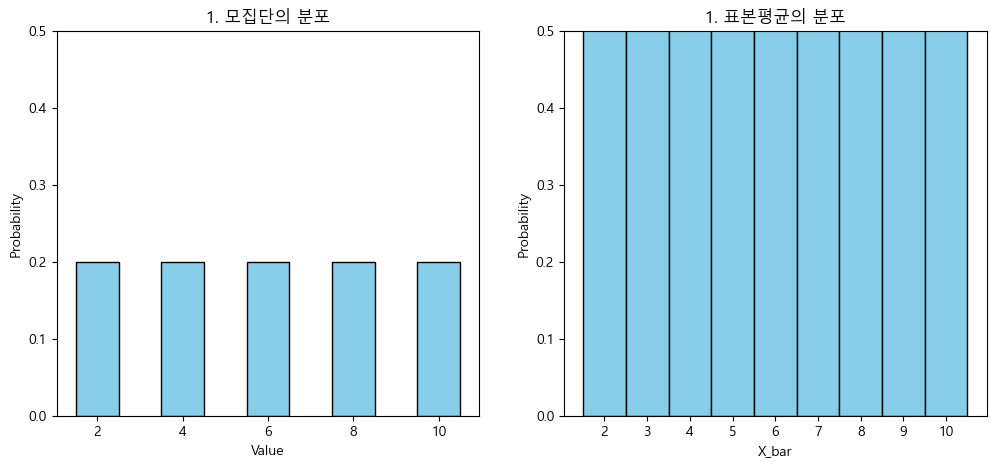

In [ ]:
# (3-2) 시각화: 모집단 VS 표본평균 분포 비교
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x_pop = [2, 4, 6, 8, 10]
y_pop = [0.2, 0.2, 0.2, 0.2, 0.2]

# 왼쪽 그래프: 모집단의 분포
axes[0].bar(x_pop, y_pop, color="skyblue", width=1.0, edgecolor="black")
axes[0].set_title("1. 모집단의 분포")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Probability")
axes[0].set_ylim(0, 0.5)
axes[0].set_xticks([2, 4, 6, 8, 10])

# 오른쪽 그래프: 표본평균의 분포
axes[1].bar(
    ex4_9_freq_table["Sample mean"],
    ex4_9_freq_table["Frequency"],
    color="skyblue",
    width=1.0,
    edgecolor="black",
)
axes[1].set_xlabel("X_bar")
axes[1].set_title("1. 표본평균의 분포")
axes[1].set_ylabel("Probability")
axes[1].set_ylim(0, 0.5)
axes[1].set_xticks(ex4_9_freq_table["Sample mean"])

plt.tight_layout()
plt.show()